In [1]:
# importing libraries 

import requests 
from bs4 import BeautifulSoup 
from tabulate import tabulate 
import os 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
# !pip install tabulate

In [3]:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 
URL = 'https://www.mohfw.gov.in/'

SHORT_HEADERS = ['SNo', 'State','Indian-Confirmed', 
				'Foreign-Confirmed','Cured','Death'] 

response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 

stats = [] 
all_rows = soup.find_all('tr') 

for row in all_rows: 
	stat = extract_contents(row.find_all('td')) 
	if stat: 
		if len(stat) == 5: 
			# last row 
			stat = ['', *stat] 
			stats.append(stat) 
		elif len(stat) == 6: 
			stats.append(stat) 

stats[-1][1] = "Total Cases"

stats.remove(stats[-1]) 


In [4]:
print(stats)
total=0
for item in stats:
    total+=int(item[2])
print(total)

[['1', 'Andaman and Nicobar Islands', '2', '0', '0', '0'], ['2', 'Andhra Pradesh', '14', '0', '1', '0'], ['3', 'Bihar', '9', '0', '0', '1'], ['4', 'Chandigarh', '7', '0', '0', '0'], ['5', 'Chhattisgarh', '6', '0', '0', '0'], ['6', 'Delhi', '38', '1', '6', '1'], ['7', 'Goa', '3', '0', '0', '0'], ['8', 'Gujarat', '44', '1', '0', '3'], ['9', 'Haryana', '19', '14', '11', '0'], ['10', 'Himachal Pradesh', '3', '0', '0', '1'], ['11', 'Jammu and Kashmir', '18', '0', '1', '1'], ['12', 'Karnataka', '55', '0', '3', '2'], ['13', 'Kerala', '165', '8', '11', '0'], ['14', 'Ladakh', '13', '0', '3', '0'], ['15', 'Madhya Pradesh', '30', '0', '0', '2'], ['16', 'Maharashtra', '177', '3', '25', '5'], ['17', 'Manipur', '1', '0', '0', '0'], ['18', 'Mizoram', '1', '0', '0', '0'], ['19', 'Odisha', '3', '0', '0', '0'], ['20', 'Puducherry', '1', '0', '0', '0'], ['21', 'Punjab', '38', '0', '1', '1'], ['22', 'Rajasthan', '46', '2', '3', '0'], ['23', 'Tamil Nadu', '32', '6', '2', '1'], ['24', 'Telengana', '38', '10

In [11]:

objects = [] 
for row in stats : 
	objects.append(row[1]) 

y_pos = np.arange(len(objects)) 

performance = [] 
for row in stats : 
	performance.append(int(row[2]) + int(row[3])) 

table = tabulate(stats, headers=SHORT_HEADERS) 
print(table) 
print(performance)

SNo  State                          Indian-Confirmed    Foreign-Confirmed    Cured    Death
-----  ---------------------------  ------------------  -------------------  -------  -------
    1  Andaman and Nicobar Islands                   2                    0        0        0
    2  Andhra Pradesh                               14                    0        1        0
    3  Bihar                                         9                    0        0        1
    4  Chandigarh                                    7                    0        0        0
    5  Chhattisgarh                                  6                    0        0        0
    6  Delhi                                        38                    1        6        1
    7  Goa                                           3                    0        0        0
    8  Gujarat                                      44                    1        0        3
    9  Haryana                                      19        

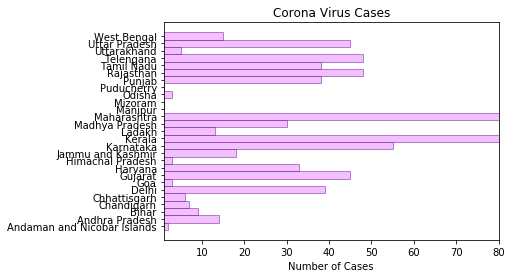

In [18]:
plt.barh(y_pos, performance, align='center', alpha=0.5,height=1, 
				color=(234/256.0, 128/256.0, 252/256.0), 
				edgecolor=(106/256.0, 27/256.0, 154/256.0)) 
# plt.bar( y_pos, align='center', alpha=0.5,height=performance,
# 				color=(234/256.0, 128/256.0, 252/256.0), 
# 				edgecolor=(106/256.0, 27/256.0, 154/256.0))
plt.yticks(y_pos, objects) 
plt.xlim(1,80) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show() 


In [ ]:
# New Whole

In [2]:
import pandas as pd
import numpy as np

In [7]:
# top ten countries data analysis
df1=pd.read_excel(r"C:\Users\gokul\Desktop\corona1.xlsx",index_col=0)

In [8]:
df1

,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
id,,,,,,,,,,,,,
1,USA,2297338,148.0,121407,NaN,956077.0,1219854.0,16533,6942,367,27339576,82611,330944050
2,Brazil,1038568,NaN,49090,NaN,520360.0,469118.0,8318,4887,231,2409830,11340,212512836
3,Russia,569063,NaN,7841,NaN,324406.0,236816.0,2300,3899,54,16321964,111846,145932745
4,India,396182,370.0,12970,NaN,214209.0,169003.0,8944,287,9,6616496,4796,1379567062
5,UK,301815,NaN,42461,NaN,NaN,NaN,379,4447,626,7433114,109511,67875356
6,Spain,292655,NaN,28315,NaN,NaN,NaN,617,6259,606,4826516,103232,46754281
7,Peru,247925,NaN,7660,NaN,135520.0,104745.0,1130,7523,232,1461266,44340,32956067
8,Italy,238011,NaN,34561,NaN,181907.0,21543.0,161,3936,572,4889103,80859,60464181
9,Chile,231393,NaN,4093,NaN,191491.0,35809.0,1911,12108,214,923513,48324,19111018


In [9]:
df1.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
count,1.000000e+01,2.000000,10.000000,0.0,8.000000,8.000000e+00,10.000000,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01
mean,5.813212e+05,259.000000,31779.000000,NaN,335395.250000,2.860708e+05,4312.600000,5267.300000,302.300000,7.359210e+06,61318.600000,2.380074e+08
std,6.537361e+05,156.977705,35344.208861,NaN,280186.020162,4.056369e+05,5326.392592,3218.775028,229.892269,8.361163e+06,41688.652232,4.125343e+08
min,2.002620e+05,148.000000,4093.000000,NaN,135520.000000,2.154300e+04,161.000000,287.000000,9.000000,9.235130e+05,4796.000000,1.911102e+07
25%,2.404895e+05,203.500000,8228.750000,NaN,176228.250000,3.477625e+04,745.250000,3908.250000,137.500000,1.698407e+06,23330.250000,5.018176e+07
50%,2.972350e+05,259.000000,20642.500000,NaN,202850.000000,1.368740e+05,2105.500000,4667.000000,231.500000,4.857810e+06,64591.500000,7.591600e+07
75%,5.258428e+05,314.500000,40486.000000,NaN,373394.500000,2.948915e+05,6946.750000,6771.250000,520.750000,7.228960e+06,98076.750000,1.958678e+08
max,2.297338e+06,370.000000,121407.000000,NaN,956077.000000,1.219854e+06,16533.000000,12108.000000,626.000000,2.733958e+07,111846.000000,1.379567e+09


In [12]:
df1['percent_inf']=df1['Total Cases']/df1['Population']*100

In [13]:
df1['percent_death']=df1['Total Deaths']/df1['Population']*100

In [15]:
result_df=df1[['Country, Other','percent_inf','percent_death']]

In [21]:
result_df.sort_values('percent_inf',ascending=False).reset_index()

,id,"Country, Other",percent_inf,percent_death
0,9,Chile,1.210783,0.021417
1,7,Peru,0.752289,0.023243
2,1,USA,0.694177,0.036685
3,6,Spain,0.625943,0.060561
4,2,Brazil,0.488708,0.023100
5,5,UK,0.444661,0.062557
6,8,Italy,0.393640,0.057159
7,3,Russia,0.389949,0.005373
8,10,Iran,0.238530,0.011187
9,4,India,0.028718,0.000940


In [22]:
result_df.sort_values('percent_death',ascending=False).reset_index()

,id,"Country, Other",percent_inf,percent_death
0,5,UK,0.444661,0.062557
1,6,Spain,0.625943,0.060561
2,8,Italy,0.393640,0.057159
3,1,USA,0.694177,0.036685
4,7,Peru,0.752289,0.023243
5,2,Brazil,0.488708,0.023100
6,9,Chile,1.210783,0.021417
7,10,Iran,0.238530,0.011187
8,3,Russia,0.389949,0.005373
9,4,India,0.028718,0.000940
